# Install Libraries

In [ ]:
!pip install pycaret-ts-alpha
!pip install Jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 468 kB 4.2 MB/s 
     |████████████████████████████████| 9.8 MB 50.3 MB/s 
     |████████████████████████████████| 2.0 MB 42.0 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 11.2 MB 53.0 MB/s 
     |████████████████████████████████| 1.4 MB 25.7 MB/s 
     |████████████████████████████████| 69 kB 8.3 MB/s 
     |████████████████████████████████| 79.9 MB 100 kB/s 
     |████████████████████████████████| 6.5 MB 33.9 MB/s 
     |████████████████████████████████| 3.3 MB 41.4 MB/s 
     |████████████████████████████████| 303 kB 71.6 MB/s 
     |████████████████████████████████| 134 kB 82.6 MB/s 
     |████████████████████████████████| 944 kB 7.6 MB/s 
     |████████████████████████████████| 34.5 MB 1.3 MB/s 
  Created wheel for pyod: filename=pyod-1.0.4-py3-none-any.whl size=165073 sha256=7bd95ffa8dd6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Libraries

In [ ]:
import pandas as pd
from pycaret.time_series import *
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# Load Datasets

In [ ]:
df_building = pd.read_csv("/content/UCD_electricity_buildings.csv")
df_campus = pd.read_csv("/content/UCD_electricity_campus.csv")

# Choose Belfield from campus and Newman Building from buildings for testing (select best models)

In [ ]:
df_building_Newman = df_building[df_building["building"]=="Newman Building (Arts) Electricity"][["timestamp","electricity_consumption"]]
df_building_Newman["timestamp"] = pd.to_datetime(df_building_Newman["timestamp"])
df_building_Newman.set_index("timestamp", inplace = True)

In [ ]:
df_building_Newman

,electricity_consumption
timestamp,
2015-01-01 00:00:00,65.615000
2015-01-01 01:00:00,66.322500
2015-01-01 02:00:00,65.917498
2015-01-01 03:00:00,66.054996
2015-01-01 04:00:00,66.454998
...,...
2022-07-19 19:00:00,90.295000
2022-07-19 20:00:00,81.742498
2022-07-19 21:00:00,81.419996


In [ ]:
model_setup_Newman = setup(data = df_building_Newman, target = "electricity_consumption", fh = 24*30*3)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: 2a45
INFO:logs:self.variable_keys: {'seasonality_present', 'X_train', 'fold_param', 'log_plots_param', '_all_metrics', 'master_model_container', 'n_jobs_param', 'seasonal_period', 'seed', 'memory', 'enforce_pi', 'exp_id', 'exogenous_present', '_all_models_internal', 'X', 'display_container', 'y_train', 'index_type', 'USI', 'fh', 'X_test', 'experiment__', 'fold_generator', 'fold_groups_param_full', 'data', 'enforce_exogenous', 'y_test', 'y_test_transformed', 'logging_param', 'X_transformed', 'X_test_transformed', 'y_train_transformed', 'strictly_positive', 'exp_name_log', '_available_plots', 'gpu_param', 'y', 'approach_type', 'idx', 'html_param', 'all_sp_values', 'primary_sp_to_use', '_all_models', 'variable_keys', '_gpu_n_jobs_param', 'y_transformed', '_ml_usecase', 'X_train_transformed',

,Description,Value
0,session_id,7359
1,Target,electricity_consumption
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(66168, 1)"
5,Train data shape,"(64008, 1)"
6,Test data shape,"(2160, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 3.04s...............


In [38]:
best_Newman = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,31.8803,45.5195,32295338509064000.0,0.3937,1.1689,0.9309,0.148,182.4733
ets,ETS,34.4202,48.5744,35950923392679548.0,0.4074,1.2623,0.9935,0.0354,14.0367
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,34.2992,47.2425,35188143865329168.0,0.4099,1.2573,0.9662,0.0878,27.1333
snaive,Seasonal Naive Forecaster,40.6419,62.4816,43113343819937656.0,0.4379,1.4901,1.2781,-0.592,0.1200
polytrend,Polynomial Trend Forecaster,35.7674,50.1701,25749758852217740.0,0.4492,1.3111,1.0259,-0.0376,0.1433
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,33.9786,45.5962,24038006186698220.0,0.4567,1.2462,0.9326,0.1511,156.7667
naive,Naive Forecaster,36.9773,55.2912,23762915802898128.0,0.4707,1.3546,1.1299,-0.3172,1.1133
theta,Theta Forecaster,37.1272,55.5298,23522216948444324.0,0.4739,1.36,1.1348,-0.331,0.4867
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,34.7932,43.4178,27509276751629964.0,0.4745,1.2755,0.888,0.2311,58.1333
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,36.2803,48.8098,34505292168725536.0,0.498,1.3283,0.9978,-0.0024,273.1033


INFO:logs:master_model_container: 26
INFO:logs:display_container: 2
INFO:logs:BaseCdsDtForecaster(regressor=ExtraTreesRegressor(n_jobs=-1, random_state=7359),
                    sp=24, window_length=24)
INFO:logs:compare_models() successfully completed......................................


In [ ]:
df_campus_Belfield = df_campus[df_campus["campus"]=="Belfield"][["timestamp","electricity_consumption"]]
df_campus_Belfield["timestamp"] = pd.to_datetime(df_campus_Belfield["timestamp"])
df_campus_Belfield.set_index("timestamp", inplace = True)

In [40]:
df_campus_Belfield

,electricity_consumption
timestamp,
2015-01-01 00:00:00,2402.0
2015-01-01 01:00:00,2377.0
2015-01-01 02:00:00,2371.0
2015-01-01 03:00:00,2387.0
2015-01-01 04:00:00,2460.0
...,...
2022-07-19 19:00:00,2649.0
2022-07-19 20:00:00,2367.0
2022-07-19 21:00:00,2359.0


In [41]:
model_setup_Belfield = setup(data = df_campus_Belfield, target = "electricity_consumption", fh = 24*30*3)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: 0a4b
INFO:logs:self.variable_keys: {'seasonality_present', 'X_train', 'fold_param', 'log_plots_param', '_all_metrics', 'master_model_container', 'n_jobs_param', 'seasonal_period', 'seed', 'memory', 'enforce_pi', 'exp_id', 'exogenous_present', '_all_models_internal', 'X', 'display_container', 'y_train', 'index_type', 'USI', 'fh', 'X_test', 'experiment__', 'fold_generator', 'fold_groups_param_full', 'data', 'enforce_exogenous', 'y_test', 'y_test_transformed', 'logging_param', 'X_transformed', 'X_test_transformed', 'y_train_transformed', 'strictly_positive', 'exp_name_log', '_available_plots', 'gpu_param', 'y', 'approach_type', 'idx', 'html_param', 'all_sp_values', 'primary_sp_to_use', '_all_models', 'variable_keys', '_gpu_n_jobs_param', 'y_transformed', '_ml_usecase', 'X_train_transformed',

,Description,Value
0,session_id,5285
1,Target,electricity_consumption
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(66168, 1)"
5,Train data shape,"(66144, 1)"
6,Test data shape,"(24, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 3.05s...............


In [42]:
best_Belfield = compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
theta,Theta Forecaster,440.4456,536.36,0.2015,0.1821,0.8525,0.6553,-0.4363,0.3267
naive,Naive Forecaster,440.5833,536.5093,0.2016,0.1822,0.8528,0.6554,-0.4383,0.9933
polytrend,Polynomial Trend Forecaster,493.4952,586.9611,0.2004,0.2069,0.9552,0.7171,-0.6519,0.0400
grand_means,Grand Means Forecaster,507.2549,593.5774,0.2419,0.2096,0.9818,0.7252,-1.3788,0.0333
croston,Croston,521.8214,623.3705,0.2288,0.2156,1.01,0.7616,-1.5789,0.1333
arima,ARIMA,547.2875,772.0453,0.23,0.2169,1.0593,0.9432,-5.8995,19.5567
snaive,Seasonal Naive Forecaster,554.0972,782.2238,0.2324,0.2193,1.0725,0.9556,-6.1533,0.0400
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,555.3931,690.7831,0.2404,0.2314,1.075,0.8439,-2.9192,11.4233
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,557.508,695.6322,0.2366,0.2315,1.0791,0.8498,-2.9238,10.5767
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,559.1281,700.0192,0.237,0.2323,1.0823,0.8552,-2.9977,11.4933


INFO:logs:master_model_container: 26
INFO:logs:display_container: 2
INFO:logs:ThetaForecaster(deseasonalize=False, sp=24)
INFO:logs:compare_models() successfully completed......................................


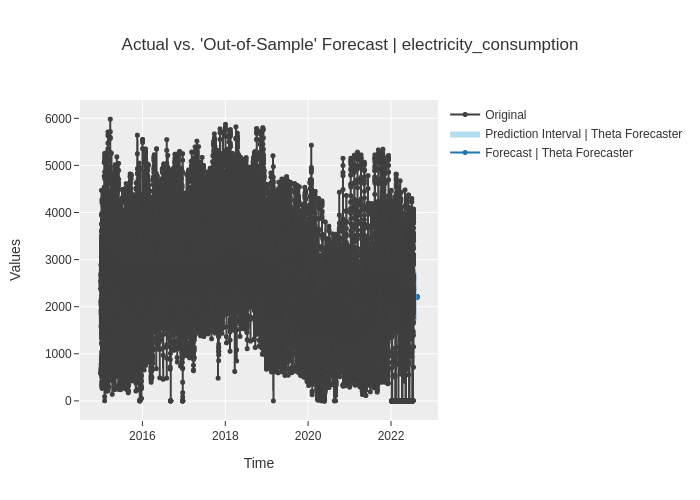

INFO:logs:Visual Rendered Successfully


In [48]:
plot_model(best_Belfield, plot = 'forecast', data_kwargs = {'fh' : 24*30*3})

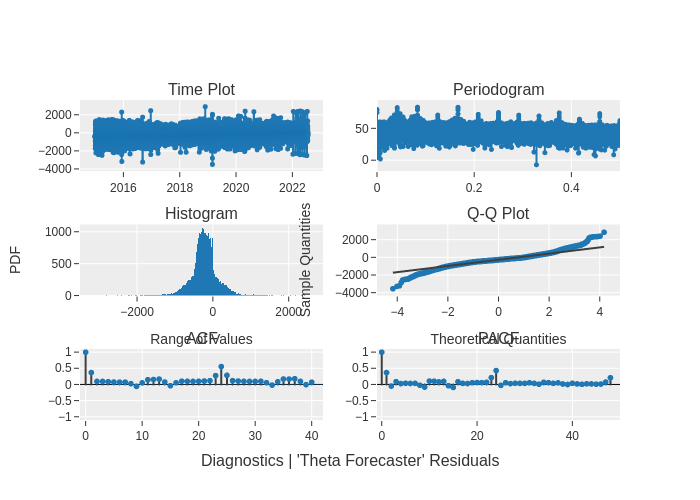

INFO:logs:Visual Rendered Successfully


In [47]:
plot_model(best_Belfield, plot = 'diagnostics')